# Example notebook for QDsim - simulating charge stability diagrams for a double quantum dot

This notebook demonstrates how to use QDsim to simulate charge stability diagrams for a double quantum dot.

Here we show how to (1-3 represents the absolute basics):
1. Import the necessary classes
2. Define the double quantum dot system
3. Define the simulation setup
4. Customize the double dot system via default attributes and introducing two sensors instead of one
5. Customize the double dot system using the setter method (full customization of the capacitance matrices)
6. Introduce a new attribute for the faster simulation: parallelization using the ray library
7. Plot the charge stability diagram for the modified double dot system by adding noise, picking only one sensor to plot, saving the plots
8. Customize the noise parameters

If you are interested more in the saving and loading options available, please refer to the other example notebook titled example_saving_and_loading_data.ipynb .

## 1. Import
First, we import the necessary classes, specifically `QDDevice`, in which we can describe the device geometry and physical properties, and `QDSimulator`, in which we can describe the simulation setup.

In [1]:
from qdsim import QDDevice
from qdsim import QDSimulator

## 2. Define the double dot system
Next, we define the double quantum dot system using the `QDDevice` class. We use a default configuration of one dimensional dots array and set the number of dots to 2. We then print the device properties and plot the device geometry. In the one dimensional dots array configuration, the dots are placed along the x-axis, and are assumed to be individually controlled by a corresponding gate electrode. A distance-based capacitive coupling model is used to calculate the capacitance between the dots (dot-dot mutual capacitance matrix) and between dots and gates (dot-gate mutual capacitance matrix).

Device type: in-line array
Number of dots: 2
Number of gates: 2
Physical dot locations: [(0, 0), (1, 0)]
Dot-dot mutual capacitance matrix:
[[0.12 0.08]
 [0.08 0.12]]
Dot-gate mutual capacitance matrix:
[[0.12 0.00]
 [0.00 0.12]]


/Users/valentinagualt/anaconda3/envs/qdsim/lib/python3.9/site-packages/qdsim/_QuantumDotDevice.py:811: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([y_bot, y_top])


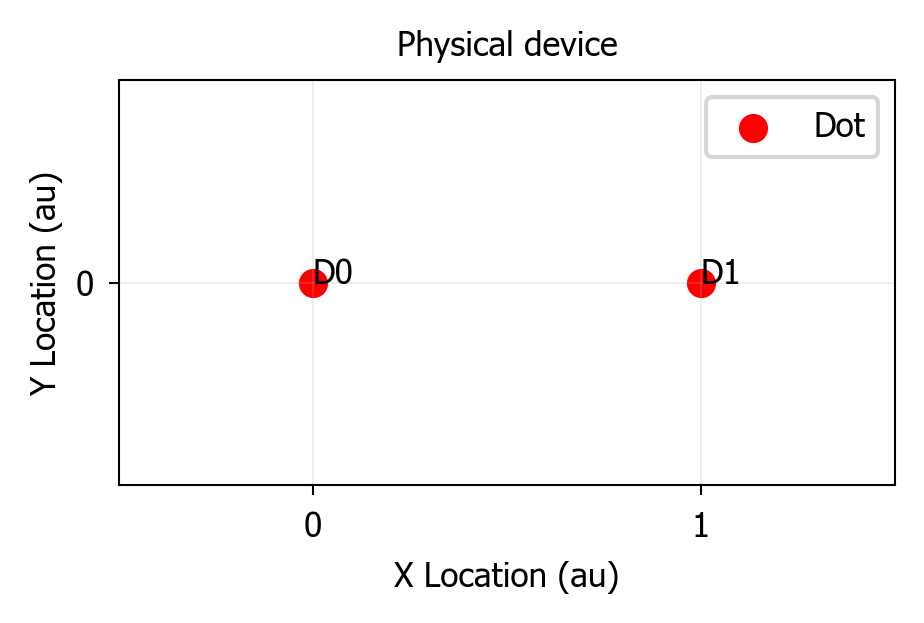

In [2]:
qddevice = QDDevice() # Create a QDDevice object
qddevice.one_dimensional_dots_array(n_dots=2) # Create a 1D array of 2 quantum dots
qddevice.print_device_info() # Print the device properties
qddevice.plot_device() # Plot the device geometry

## 3. Define the simulation setup
Next, we define the simulation setup using the `QDSimulator` class. In this case we aim to simulate electron-based devices. After instancing a `QDSimulator` object, we set the sensor location in cartesian coordinates \[[x0, y0]\] (they can be more than one, but here we focus on one) from which the charge stability diagram is measured. We then simulate the charge stability diagram by calling the proper method. Here we give in input the quantum dot device, the gates voltage ranges to be scanned, and the solver to be used (the default is `SCIP`, which is open source, but here we use `MOSEK` since it is faster and free to access within the academic community). We also set the number of points in the gate voltage range to be sampled, and the indexes of the gates to be scanned (i.e. the x and y axis in the charge stability diagram plot). Finally, we plot the charge stability diagram.


100%|██████████| 1/1 [00:00<00:00, 63.60it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/valentinagualt/Documents/PhD/qdsim/docs/results/figures/DQD_current.png'

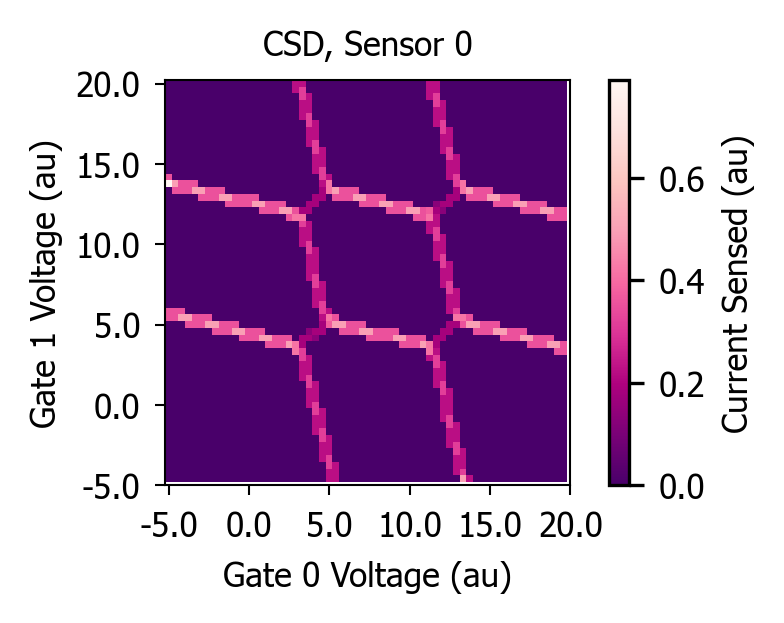

In [3]:
# Create a QDSimulator object simulating electron-based devices
qdsimulator = QDSimulator('Electrons')

# Set the sensor location from which the charge stability diagram is measured
qdsimulator.set_sensor_locations([(2, 1)])

# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(
    qd_device=qddevice, v_range_x=[10, 10], solver='MOSEK',
    v_range_y=[10, 10], n_points_per_axis=60,
    scanning_gate_indexes=[0, 1])

# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', save_plot_to_filepath='../../results/figures/DQD_current.png')

So far we have simulated the charge stability diagram for a default double quantum dot system. The package offers a few customization options available for the default architectures

Here we see an example.

## 4. Customizing of the double dot system via default attributes, and introducing two sensors instead of one

We can customize the default double quantum dot system by using the following attributes:
- `equal_dots`: if True, all quantum dots have the same self-capacitance, if False, random properly scaled values are assigned to add some variation
- `equal_gates`: if True, all the corresponding dot-gate mutual capacitance values are the same for the proper dot-gates couple, i.e. all gates have the same capacitance coupling to their respective dots, if False, random properly scaled values are assigned to add some variation
- `crosstalk_strength`: strength of the crosstalk between the gates and the dots to which they are not directly associated. It is a number between 0 and 1, where 0 means no crosstalk and 1 means 'full' crosstalk (arbitrary values).

Also, we can introduce more than one sensor to the plot. This can be done by specifying the sensor locations and labels to be added to the plot by using the following attributes:
- `sensor_locations`: list of sensor locations [[x0, y0], [x1, y1], ...]
- `sensor_labels`: list of sensor labels ['S0', 'S1', ...]

 In this case, we add two sensors to the plot.


Device type: in-line array
Number of dots: 2
Number of gates: 2
Physical dot locations: [(0, 0), (1, 0)]
Dot-dot mutual capacitance matrix:
[[0.12 0.08]
 [0.08 0.12]]
Dot-gate mutual capacitance matrix:
[[0.12 0.03]
 [0.03 0.10]]


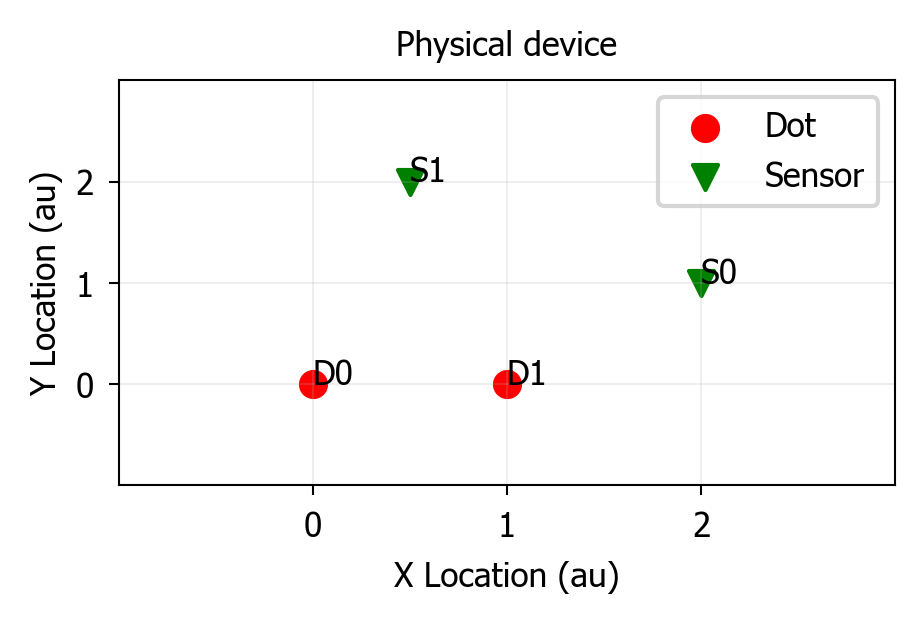

In [26]:
qddevice.one_dimensional_dots_array(n_dots=2, equal_dots=False, equal_gates=False, crosstalk_strength=0.5) # Create a 1D array of 2 quantum dots
qddevice.print_device_info() # Print the device properties
# Plot the device geometry and add sensors to the plot
sensor_locations = [[2, 1], [0.5, 2]]
sensor_labels = ['S0', 'S1']
qddevice.plot_device(sensor_locations=sensor_locations, sensor_labels=sensor_labels)

## 5. Customizing the double dot system using the setter methods

We can also customize the default double quantum dot configuration by using the setter methods. This allows for full customization of the dot-dot and dot-gate capacitance matrices. The setter method allows for the full customization of the capacitance matrices, and it is particularly useful when the user wants to set specific values for the capacitances.

This is done by using the following methods:
- `set_dot_dot_mutual_capacitance_matrix`: set the dot-dot mutual capacitance matrix
- `set_dot_gate_mutual_capacitance_matrix`: set the dot-gate mutual capacitance matrix

In [23]:
import numpy as np

# Define the dot-dot and dot-gate custom capacitance matrices
cdd = np.array([[0.10, 0.7],[0.7, 0.12]])
cdg = np.array([[0.14, 0.03],[0.03, 0.12]])

# Modify the class attributes
qddevice.set_dot_dot_mutual_capacitance_matrix(cdd)
qddevice.set_dot_gate_mutual_capacitance_matrix(cdg)

# Print the device information
qddevice.print_device_info()

Device type: in-line array
Number of dots: 2
Number of gates: 2
Physical dot locations: [(0, 0), (1, 0)]
Dot-dot mutual capacitance matrix:
[[0.10 0.70]
 [0.70 0.12]]
Dot-gate mutual capacitance matrix:
[[0.14 0.03]
 [0.03 0.12]]


## 6. Define the simulation setup for the modified double dot system - introducing parallelization

We can use the same simulator object to simulate the charge stability diagram for the modified double quantum dot system (here we are using the data from Section 4). We can use the same simulation setup as before, but we need to set the sensor locations again, since this time we want to simulate for two different sensors.

Also, here we introduce a new option for the simulation setup:
- `use_ray`: if True, the simulation is performed using the ray parallelization library, which is faster than the default method

In [27]:
# Set the sensor locations from which the charge stability diagram is measured
qdsimulator.set_sensor_locations(sensor_locations=sensor_locations)

# Simulate the charge stability diagram
qdsimulator.simulate_charge_stability_diagram(
    qd_device=qddevice, v_range_x=[-5, 20], solver='MOSEK',
    v_range_y=[-5, 20], n_points_per_axis=60,
    scanning_gate_indexes=[0, 1], use_ray=True)


2024-03-26 15:51:47,143	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
100%|██████████| 2/2 [00:00<00:00, 123.02it/s]


## 7. Plot the charge stability diagram for the modified double dot system - adding noise, picking only one sensor to plot, saving the plot
Finally, we plot the charge stability diagram for the modified double quantum dot system.
Here we introduce a few other options for the plotting function:
- `cmapvalue`: colormap to be used for the plot
- `plot_potential`: if True, the potential energy is plotted

Since we are using two sensors, the plotting function plots the charge stability diagram for each sensor together.

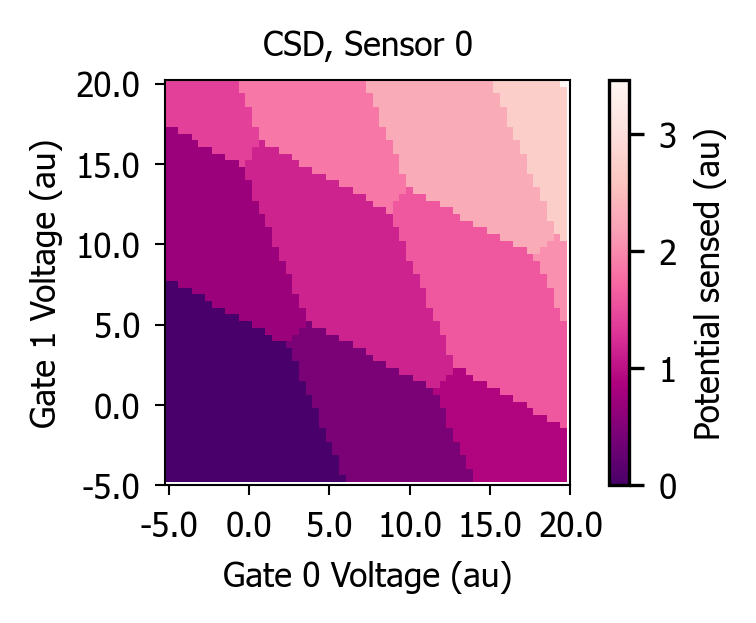

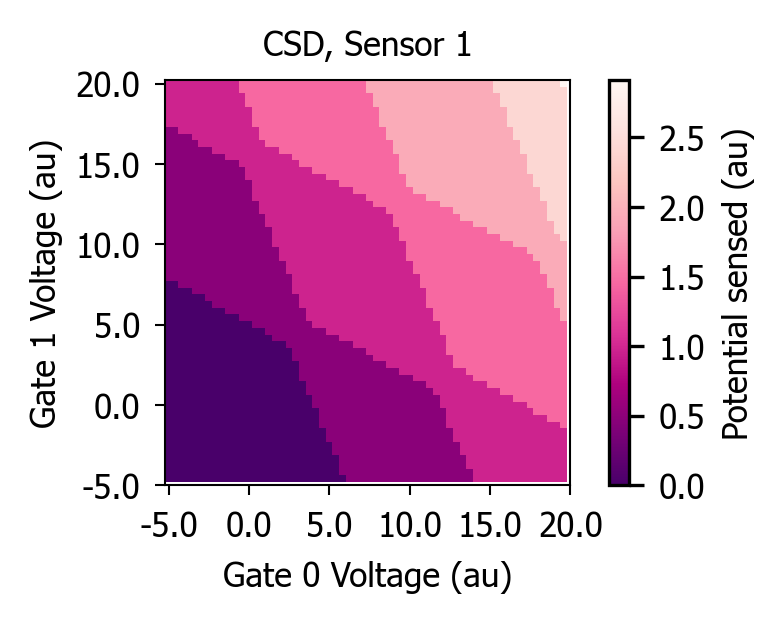

In [28]:
# Plot the charge stability diagram
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=True)


### Plot only for one sensor, plus add noise to the plot

If we want to plot the charge stability diagram for each sensor separately, we can use the following option:
- `only_plot_sensors`: list of indexes of the sensors to be plotted

Here we plot the charge stability diagram for the second sensor only (therefore index 1), while at the same time introducing new features for the plotting function:
- `gaussian_noise`: if True, Gaussian noise is added to the plot
- `white_noise`: if True, white noise is added to the plot
- `pink_noise`: if True, pink noise is added to the plot
- `save_plot_to_filepath`: if not None, the plot is saved to the specified file path with the specified file name and extension

NB: when saving the plots for multiple sensors, the plots are overwritten, so it is recommended to save them with different file names, using for instance a `for` loop, as shown below.


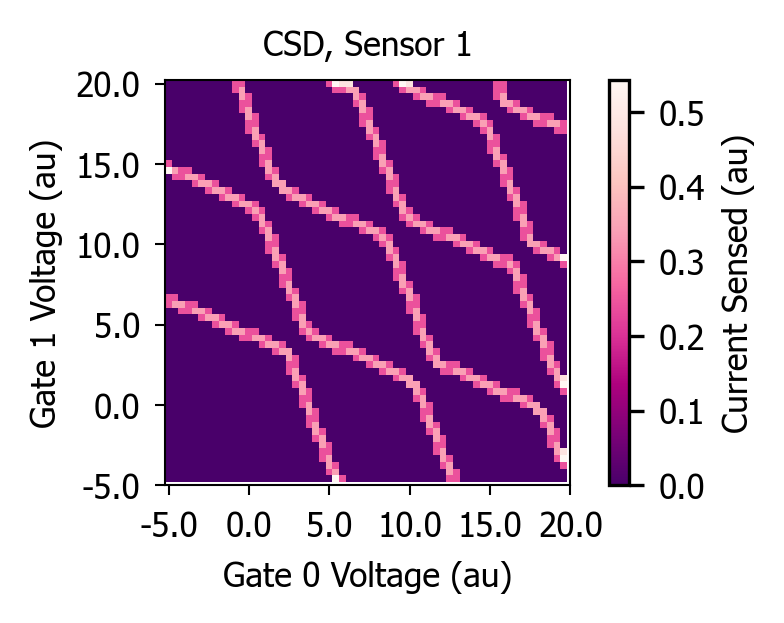

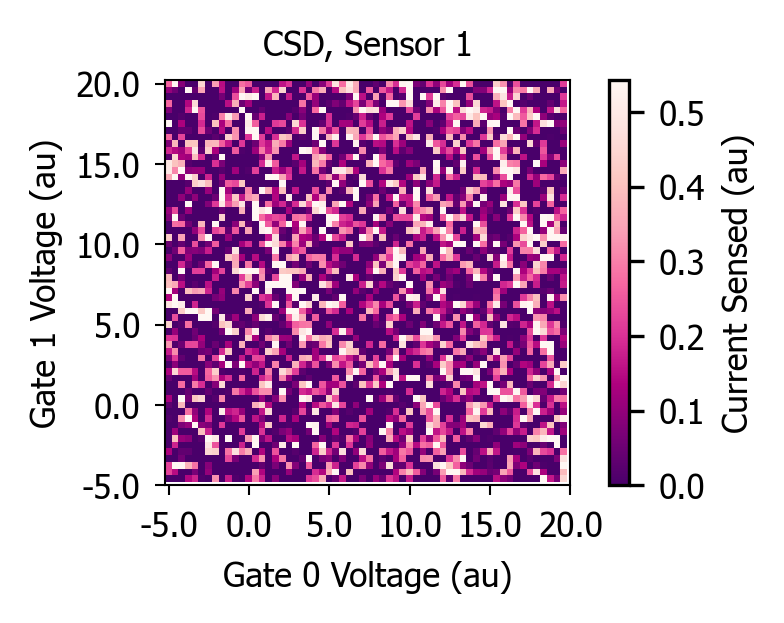

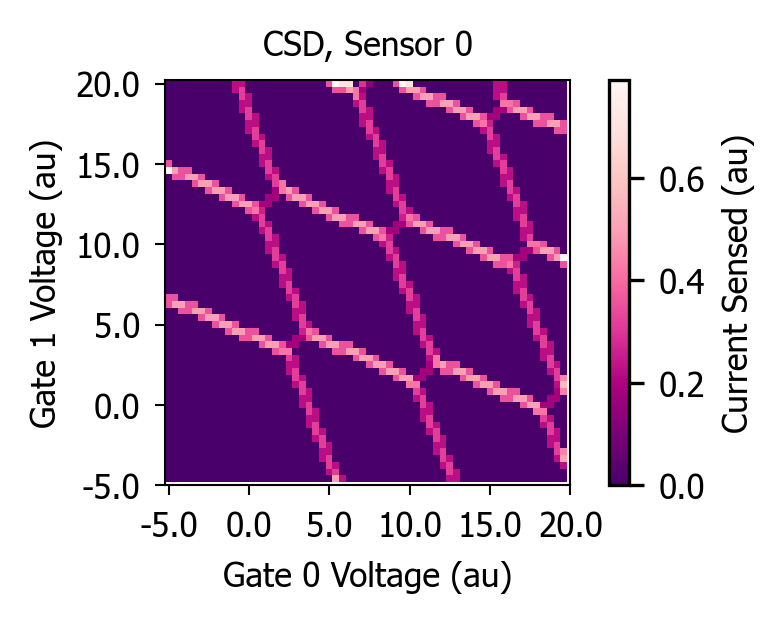

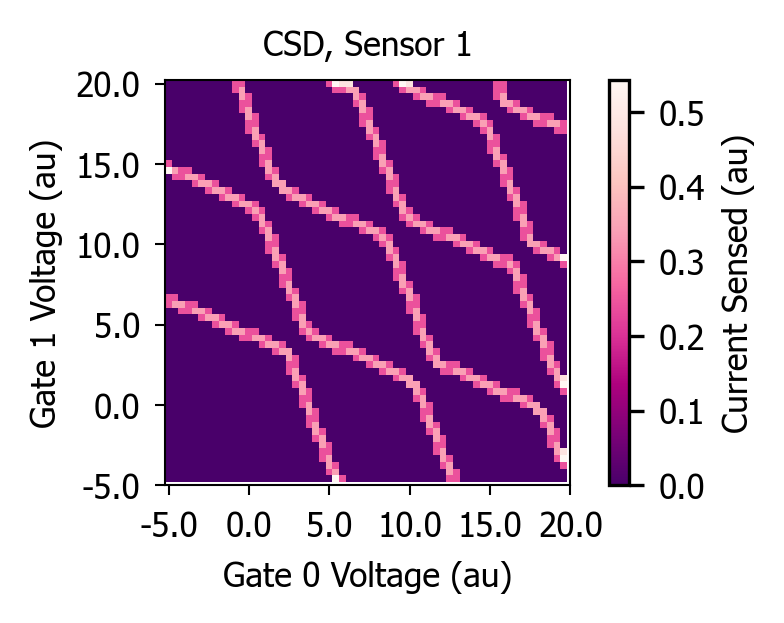

In [14]:

qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, only_plot_sensors=[1])
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, gaussian_noise=True, white_noise=True, pink_noise=True, only_plot_sensors=[1], save_plot_to_filepath='../results/figures/DQD_current_noisy.pdf')

save_plots_for_sensor_indexes = [0,1]
for sensor_index in save_plots_for_sensor_indexes:
    qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu_r', plot_potential=False, only_plot_sensors=[sensor_index], save_plot_to_filepath=f'../results/figures/DQD_current_sensor_{sensor_index}.pdf')

## 8. Customizing the noise parameters

For those seeking to customize the noise parameters, the following attributes can be used:
- `gaussian_noise_params`: list of parameters for the Gaussian noise [mean, standard deviation]
- `white_noise_params`: list of parameters for the white noise [min, max]
- `pink_noise_params`: list of parameters for the pink noise [frequency, amplitude]

An example is shown below:


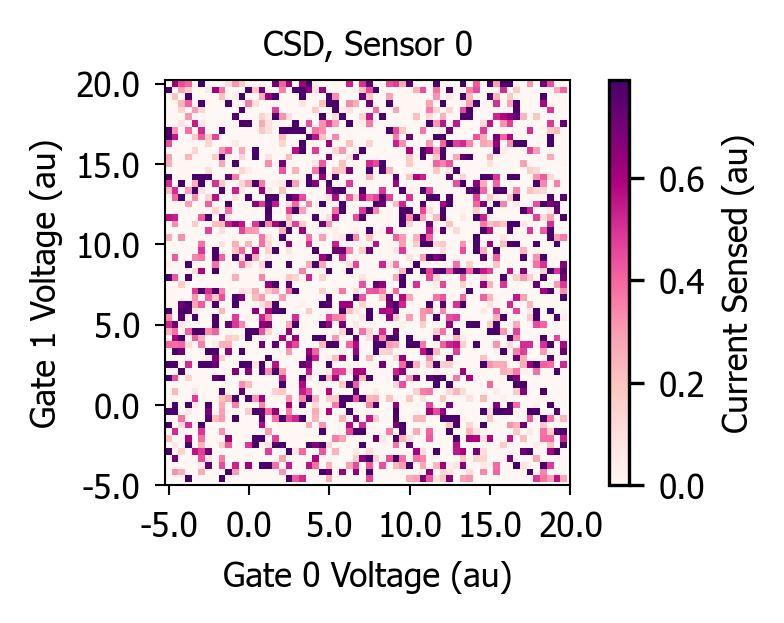

In [7]:
qdsimulator.plot_charge_stability_diagrams(cmapvalue='RdPu', plot_potential=False, gaussian_noise=True, white_noise=True, pink_noise=True, gaussian_noise_params=[0, 0.5], white_noise_params=[-0.5, 0.2], pink_noise_params=[12000, 4])